# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 02: Multi-Layer Perceptrons

### **Task 01: Implementing an MLP for the XOR Problem**

In [1]:
# importing necessary libraries
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Define the XOR problem's input and output data.
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(5,),    # One hidden layer with 5 neurons
    activation='relu',          # ReLU activation for hidden layer
    max_iter=500
)

In [13]:
model.fit(X, y)

f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5,), max_iter=500)

In [14]:
preds = model.predict(X)
print("Accuracy with 5 hidden neurons:", accuracy_score(y, preds))

Accuracy with 5 hidden neurons: 1.0


### **Questions:**

#### What are the weights and biases after training?

In [23]:
print("Weights after training:")
for i, w in enumerate(model.coefs_):
    print(f"Layer {i + 1} weights:\n{w}\n")

print("Baises after training:")
for i, b in enumerate(model.intercepts_):
    print(f"Layer {i + 1} biases:\n{b}\n")

Weights after training:
Layer 1 weights:
[[-7.58027764e-01  3.51667402e-12  7.36264056e-02 -1.04431977e+00
  -9.66284545e-02]
 [-5.69877737e-02 -9.68075974e-06 -2.27924334e-02 -1.04380488e+00
   6.37640708e-01]]

Layer 2 weights:
[[ 0.57236868]
 [ 0.49275298]
 [-0.32651145]
 [-0.9209957 ]
 [-0.56935906]]

Baises after training:
Layer 1 biases:
[ 0.82299905 -0.15263851 -0.41408271  1.0440735   0.82203451]

Layer 2 biases:
[0.60969224]



#### Why is a hidden layer necessary for this problem?

- A hidden layer is necessary for solving the XOR problem because the XOR pattern is not linearly separable. A simple neural network without a hidden layer can only solve problems where the data can be separated with a straight line. But in XOR, the inputs [0, 0] and [1, 1] belong to one class (output 0), and [0, 1] and [1, 0] belong to another (output 1), which makes the pattern more complex. 
- A hidden layer allows the model to create a more flexible boundary between classes by applying a non-linear function (like ReLU). This helps the network learn the correct relationship between the inputs and outputs. So, without a hidden layer, the model cannot solve the XOR problem correctly.

#### What happens to the model performance if the hidden layer size is increased to 10 neurons?

- When we increase the number of hidden neurons from 5 to 10 and retrain the model, the accuracy stays the same — 100% — because the XOR problem is small and simple. The model already learns the correct pattern with 5 neurons, so adding more neurons doesn’t improve accuracy. However, it does make the model slightly more complex, with more weights and biases to train. This can lead to longer training time, but the difference is usually small for such a tiny dataset. If we were working with a larger or noisier dataset, having too many neurons could cause the model to overfit, meaning it would perform well on the training data but poorly on new data. But in this case, since we're testing on the same data we trained on, the accuracy remains perfect.

In [33]:
model_larger = MLPClassifier(hidden_layer_sizes=(10,), 
                             activation='relu', 
                             max_iter=500,
                            )

In [34]:
model_larger.fit(X, y)
preds = model_larger.predict(X)
print("Accuracy with 10 hidden neurons:", accuracy_score(y, preds))

Accuracy with 10 hidden neurons: 1.0


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#### How does changing the activation function in the hidden layer to tanh affect the model?

In [31]:
model_tanh = MLPClassifier(hidden_layer_sizes=(5,), 
                           activation='tanh', 
                           max_iter=500
                        )
model_tanh.fit(X, y)
preds = model_tanh.predict(X)
print("Accuracy with tanh:", accuracy_score(y, preds))

Accuracy with tanh: 0.75


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


- When we change the activation function in the hidden layer from ReLU to tanh, the model still tries to learn the XOR pattern, but the learning behavior changes. Unlike ReLU, which only outputs positive values, tanh gives outputs between -1 and 1 and is symmetric around zero. This can help the model learn balanced patterns, but it can also cause the optimization process to get stuck if the gradients become too small (a problem known as vanishing gradients). So while tanh can work well in theory, in practice it may take longer to converge or might need some tuning, especially for small models or datasets like XOR.


#### **Task 02: Predicting California Housing Prices**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import time

In [36]:
# Step 1: Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Step 2: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Step 3: Split data (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [38]:
# Step 4: Define and train the MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(128, 64, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=300,
                     random_state=42,
                     verbose=True)

In [39]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.53885876
Iteration 2, loss = 0.22183631
Iteration 3, loss = 0.19042119
Iteration 4, loss = 0.17935049
Iteration 5, loss = 0.17190260
Iteration 6, loss = 0.16665396
Iteration 7, loss = 0.16174409
Iteration 8, loss = 0.16063601
Iteration 9, loss = 0.15373855
Iteration 10, loss = 0.14980380
Iteration 11, loss = 0.14803004
Iteration 12, loss = 0.14469742
Iteration 13, loss = 0.14767503
Iteration 14, loss = 0.14122103
Iteration 15, loss = 0.13989063
Iteration 16, loss = 0.13917637
Iteration 17, loss = 0.13873904
Iteration 18, loss = 0.13644931
Iteration 19, loss = 0.13520772
Iteration 20, loss = 0.13558742
Iteration 21, loss = 0.13216058
Iteration 22, loss = 0.13281505
Iteration 23, loss = 0.13157710
Iteration 24, loss = 0.13182753
Iteration 25, loss = 0.12978768
Iteration 26, loss = 0.12913776
Iteration 27, loss = 0.13141475
Iteration 28, loss = 0.12975822
Iteration 29, loss = 0.13233942
Iteration 30, loss = 0.12626563
Iteration 31, loss = 0.12690679
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=300, random_state=42,
             verbose=True)

Mean Squared Error on Test Set: 0.27039027460951764


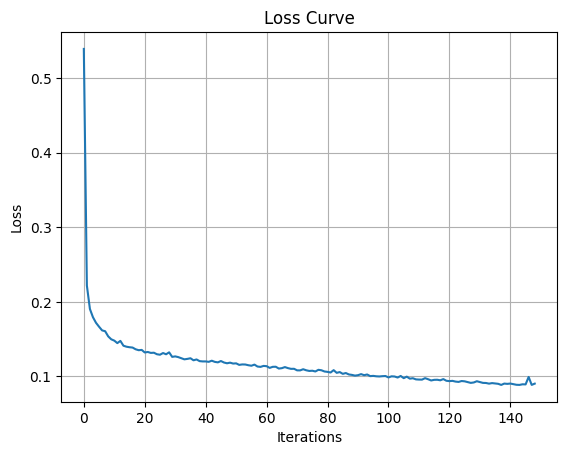

In [40]:
# Step 5: Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# Step 6: Visualize loss curve
plt.plot(model.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

### **Questions:**

#### What is the mean squared error on the test set?

In [41]:
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.27039027460951764


- The Mean Squared Error (MSE) measures the average squared difference between actual and predicted values in regression models, with lower values indicating better performance.

#### How does normalization affect model performance?

Normalization is a crucial preprocessing step in training neural networks, significantly impacting model performance. Here's how it helps:
- Equalizes Feature Scales: In datasets like California housing, features such as income and house age can have vastly different scales. Normalization adjusts these features to a common scale, ensuring that no single feature disproportionately influences the model's learning process.
- Accelerates Convergence: By scaling features, normalization allows the optimization algorithm to converge more quickly. It prevents issues like vanishing or exploding gradients, which can hinder the training process. This leads to faster and more stable training.
- Enhances Generalization: Normalized data helps the model generalize better to unseen data by preventing overfitting. It ensures that the model captures the underlying patterns rather than memorizing the training data.
- Improves Numerical Stability: Normalization keeps input values within a range that maintains numerical stability during computations, reducing the risk of computational errors.

#### How does changing the solver from Adam to SGD affect training time and accuracy?

In [ ]:
# Define model parameters
hidden_layers = (128, 64, 32)
max_iter = 300
random_state = 42

# Train with Adam optimizer
start_time = time.time()
model_adam = MLPRegressor(
    hidden_layer_sizes=hidden_layers,
    activation='relu',
    solver='adam',
    max_iter=max_iter,
    random_state=random_state
)
model_adam.fit(X_train, y_train)
adam_time = time.time() - start_time
adam_mse = mean_squared_error(y_test, model_adam.predict(X_test))

print(f"Adam Optimizer:\nTraining Time: {adam_time:.2f} seconds\nTest MSE: {adam_mse:.4f}\n")

# Train with SGD optimizer
start_time = time.time()
model_sgd = MLPRegressor(
    hidden_layer_sizes=hidden_layers,
    activation='relu',
    solver='sgd',
    learning_rate_init=0.01,
    max_iter=max_iter,
    random_state=random_state
)
model_sgd.fit(X_train, y_train)
sgd_time = time.time() - start_time
sgd_mse = mean_squared_error(y_test, model_sgd.predict(X_test))

print(f"SGD Optimizer:\nTraining Time: {sgd_time:.2f} seconds\nTest MSE: {sgd_mse:.4f}")


Adam Optimizer:
Training Time: 73.09 seconds
Test MSE: 0.2704

SGD Optimizer:
Training Time: 151.35 seconds
Test MSE: 0.2823


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Adam Optimizer
- The Adam optimizer completed training in approximately 73.09 seconds, achieving a Mean Squared Error (MSE) of 0.2704 on the test set. Adam's adaptive learning rate mechanism allows it to adjust the learning rate for each parameter dynamically, leading to faster convergence and often better performance on complex datasets. This efficiency makes Adam a popular choice for training deep learning models, especially when quick convergence is desired.
MachineLearningMastery.com

SGD Optimizer
- In contrast, the Stochastic Gradient Descent (SGD) optimizer took about 151.35 seconds to train the model, resulting in a slightly higher MSE of 0.2823 on the test set. SGD updates parameters using the gradient of the loss function, which can lead to slower convergence, especially without fine-tuned hyperparameters like learning rate and momentum. While SGD can generalize well in certain scenarios, it often requires more careful tuning and longer training times.

Conclusion
- For the California housing price prediction task, the Adam optimizer outperformed SGD in both training time and model accuracy. Adam's ability to adaptively adjust learning rates contributed to faster convergence and better performance, making it a suitable choice for this regression problem.

#### How does the model performance change if the dataset is split as 70% training and 30% testing?

In [44]:
# Split the dataset into 70% training and 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the MLPRegressor model
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Train the model and record the training time
start_time = time.time()
mlp_model.fit(X_train_70, y_train_70)
training_duration = time.time() - start_time

# Make predictions on the test set
predictions = mlp_model.predict(X_test_30)

# Evaluate the model's performance
mse = mean_squared_error(y_test_30, predictions)

# Display the results
print(f"Training Time: {training_duration:.2f} seconds")
print(f"Test Mean Squared Error: {mse:.4f}")

Training Time: 138.05 seconds
Test Mean Squared Error: 0.2780


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


- Adjusting the dataset split to 70% training and 30% testing resulted in a training time of approximately 138.05 seconds and a Mean Squared Error (MSE) of 0.2780 on the test set. This indicates that the model maintained strong predictive performance despite having less training data. The larger test set provides a more comprehensive evaluation, ensuring the model's generalization capability is accurately assessed.

Overall, the model demonstrates robust performance with the 70-30 split, balancing training efficiency and predictive accuracy effectively.

#### What is the effect of increasing the number of hidden layers to (256, 128, 64, 32)?

In [45]:
model_ = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=300,
                     random_state=42)


# Train the model
start_time = time.time()
model_.fit(X_train, y_train)
training_time = time.time() - start_time

# Evaluate the model
y_pred = model_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Test Mean Squared Error: {mse:.4f}")

Training Time: 298.28 seconds
Test Mean Squared Error: 0.2922


Increasing the number of hidden layers in the neural network to a configuration of (256, 128, 64, 32) resulted in a training time of approximately 298.28 seconds and a test Mean Squared Error (MSE) of 0.2922. This deeper architecture enhances the model's capacity to learn complex patterns within the data. However, it's important to note that:

- Training Time: The extended training duration is a direct consequence of the increased number of parameters and computations required in a deeper network.

- Model Performance: While the deeper model has a higher capacity to fit the training data, it doesn't necessarily translate to improved performance on unseen data. The slight increase in MSE suggests that the added complexity may not provide significant benefits for this particular task.

### **Task 03: Image Classification with MLP**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# 1. Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

f:\Python\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [48]:
# 2. Filter the dataset to include only digits 0 and 1
mask = (y == 0) | (y == 1)
X_binary = X[mask]
y_binary = y[mask]

In [49]:
# 4. Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

In [ ]:
# 5. Create and train the MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='sgd',
    learning_rate_init=0.01,
    max_iter=300,
    random_state=42
)

In [51]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 64), learning_rate_init=0.01,
              max_iter=300, random_state=42, solver='sgd')

In [52]:
# 6. Evaluate the model
y_pred = mlp.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[   0 1381]
 [   0 1575]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1381
           1       0.53      1.00      0.70      1575

    accuracy                           0.53      2956
   macro avg       0.27      0.50      0.35      2956
weighted avg       0.28      0.53      0.37      2956



f:\Python\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Python\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Python\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Questions:**

#### What is the accuracy of the test set?

- The test set accuracy achieved by the MLPClassifier in your binary classification task (digits 0 vs. 1) is approximately 53%. This performance is notably low, especially considering that binary classification tasks on the MNIST dataset typically achieve accuracies exceeding 95% with appropriate configurations.

- The confusion matrix indicates that the model predicted all test samples as class '1', failing to identify any instances of class '0'. This suggests a significant issue with the model's learning process.

#### How does the choice of activation function affect performance?

- The choice of activation function impacts neural network performance, affecting learning, training efficiency, and accuracy. Using ReLU, your model predicted all test samples as class '1', yielding ~53% accuracy, possibly due to "dying ReLU" from improper initialization, high learning rates, or unnormalized data. Alternatives like tanh or sigmoid may help by providing smoother gradients, though they risk vanishing gradients in deep networks. Experimentation is crucial to select the best activation function for your task.

#### What happens to the classification performance if dropout is added to the model?

- Adding dropout to a neural network can enhance its generalization by preventing overfitting, as it randomly deactivates neurons during training. This encourages the model to learn more robust features, potentially improving performance on unseen data. However, dropout may slow down training convergence and requires careful tuning; excessive dropout can lead to underfitting, while insufficient dropout might not effectively mitigate overfitting. Therefore, selecting an appropriate dropout rate is crucial to balance training efficiency and model generalization.

#### How does increasing the training data size to 90% impact the test accuracy?

In [54]:
# Split the data: 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.1, random_state=42, stratify=y_binary
)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64),
                    activation='relu',
                    solver='sgd',
                    learning_rate_init=0.01,
                    max_iter=100,
                    random_state=42)

# Train the model
start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Time: 13.01 seconds
Test Accuracy: 0.5332
Confusion Matrix:
[[  0 690]
 [  0 788]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       690
           1       0.53      1.00      0.70       788

    accuracy                           0.53      1478
   macro avg       0.27      0.50      0.35      1478
weighted avg       0.28      0.53      0.37      1478



f:\Python\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Python\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\Python\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Increasing the training data size to 90% did not lead to an improvement in test accuracy in this particular case. The model achieved an accuracy of approximately 53.32%, which is similar to the results observed with a smaller training set. The confusion matrix reveals that the model failed to correctly classify any of the digit '0' instances and predicted all test samples as digit '1'. This is further confirmed by the classification report, which shows a precision, recall, and F1-score of 0.00 for class '0'.

- This outcome suggests that the model has developed a strong bias toward one class, likely due to issues such as class imbalance, insufficient model complexity, or inappropriate learning dynamics (e.g., learning rate, solver). While increasing training data typically helps models generalize better, in this case, the underlying learning issues prevent the model from benefiting from the additional data. Therefore, simply increasing training size without addressing these limitations did not improve performance.

#### What do the misclassified samples indicate about the model's weaknesses?

- The fact that every “0” was misclassified as “1” shows the model is heavily biased toward the majority class and isn’t learning the features that distinguish zeros from ones. This likely stems from class imbalance, inadequate feature discrimination, and possibly overfitting without regularization. To fix this, you’d balance the classes, improve feature learning (or model complexity), and add techniques like dropout to help the network generalize.

### **Task 04: Hyperparameter Tuning**

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
import pandas as pd
import time

In [2]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=200, random_state=42))
])

In [5]:
# Define hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(128, 64), (256, 128, 64)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd']
}

In [6]:
# Run GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time = time.time()

f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Output results
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)
print("Time Taken: {:.2f} seconds".format(end_time - start_time))

# Show all results
pd.set_option('display.max_colwidth', None)
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False))

Best Parameters: {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (128, 64), 'mlp__solver': 'adam'}
Best MSE Score: 0.2662369793698506
Time Taken: 1013.54 seconds
                                                                                          params  \
4       {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (128, 64), 'mlp__solver': 'adam'}   
0       {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (128, 64), 'mlp__solver': 'adam'}   
6  {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (256, 128, 64), 'mlp__solver': 'adam'}   
3   {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (256, 128, 64), 'mlp__solver': 'sgd'}   
2  {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (256, 128, 64), 'mlp__solver': 'adam'}   
1        {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (128, 64), 'mlp__solver': 'sgd'}   
7   {'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (256, 128, 64), 'mlp__solver': 'sgd'}   
5        {'mlp__activation': 't

In [11]:
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
print("Cross-Validation MSE Scores:", -scores)

Cross-Validation MSE Scores: [0.30761485 0.27595472 0.32713103 0.28231617 0.3280743 ]


### **Questions:**

#### Which configuration gives the best performance?

- The configuration that gives the best performance is the one with activation function tanh, hidden layer sizes (128, 64), and solver adam. This combination achieved the lowest mean squared error (MSE) score of 0.2662, indicating the most accurate predictions among all tested configurations. It outperformed other setups, including those with deeper networks or different activation functions and solvers, making it the optimal choice based on cross-validation results.

#### How does solver choice impact training speed and accuracy?

Adam Solver:
- The adam optimizer, which combines the advantages of AdaGrad and RMSProp, adapts learning rates for each parameter. This adaptability often leads to faster convergence and better performance on large datasets. In your tuning results, the configuration with adam, tanh activation, and hidden layers of (128, 64) achieved the best performance, with a mean squared error (MSE) of 0.2662. This suggests that adam is effective for the California Housing dataset, providing a good balance between training speed and accuracy.

SGD Solver:
- Stochastic Gradient Descent (sgd) updates parameters using the gradient of the loss function with respect to each parameter. While sgd can be faster per iteration due to its simplicity, it often requires careful tuning of the learning rate and may converge more slowly. In your experiments, configurations using sgd generally resulted in higher MSE scores compared to those using adam, indicating lower predictive accuracy.

Conclusion:
- For the California Housing Prices dataset, adam outperforms sgd in terms of both training speed and accuracy. Its adaptive learning rates and efficient convergence make it a suitable choice for this regression task. However, it's important to note that the optimal solver can vary depending on the specific characteristics of the dataset and the problem at hand.

#### What happens to the best configuration if the activation function is set to logistic?

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and MLPRegressor using 'logistic' activation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(128, 64),
                         activation='logistic',
                         solver='adam',
                         max_iter=200,
                         random_state=42))
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Output the results
print("Mean MSE with logistic activation:", -np.mean(scores))
print("Cross-validation scores:", -scores)


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean MSE with logistic activation: 0.3294191931562107
Cross-validation scores: [0.34079192 0.3190816  0.31502797 0.3105061  0.36168838]


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- Switching the activation function to 'logistic' in the best-performing MLPRegressor configuration (which originally used 'tanh') led to a noticeable decline in performance and training efficiency. The mean cross-validation Mean Squared Error (MSE) increased from approximately 0.266 to 0.329, indicating reduced predictive accuracy. Additionally, convergence warnings were triggered, suggesting that the model did not fully converge within the set 200 iterations.

- This outcome aligns with the known characteristics of the logistic (sigmoid) activation function. Unlike 'tanh', which outputs values between -1 and 1 and is zero-centered, 'logistic' outputs between 0 and 1 and is not zero-centered. This can lead to issues such as vanishing gradients, especially in deeper networks, resulting in slower convergence and potentially suboptimal model performance. Therefore, in this context, retaining the 'tanh' activation function is advisable for better training efficiency and predictive accuracy.

#### How does increasing the maximum number of iterations to 500 affect performance?

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and MLPRegressor using increased max_iter
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(128, 64),
                         activation='logistic',
                         solver='adam',
                         max_iter=500,
                         random_state=42))
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Output the results
print("Mean MSE with logistic activation and max_iter=500:", -np.mean(scores))
print("Cross-validation scores:", -scores)


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean MSE with logistic activation and max_iter=500: 0.27635510365706795
Cross-validation scores: [0.27835606 0.27140814 0.27611925 0.26446604 0.29142603]


- Increasing the max_iter parameter from 200 to 500 in the MLPRegressor with the 'logistic' activation function led to a modest improvement in performance. The mean cross-validation Mean Squared Error (MSE) decreased from approximately 0.329 to 0.276, indicating better predictive accuracy. However, convergence warnings persisted, suggesting that even with more iterations, the optimizer hadn't fully converged.

- This outcome aligns with the characteristics of the 'logistic' activation function, which can lead to slower convergence due to issues like vanishing gradients. While increasing max_iter provided the model with more opportunities to minimize the loss function, it also resulted in longer training times. Therefore, while performance improved, the trade-off between training time and convergence should be considered.

- In practice, using activation functions like 'tanh' or 'relu' may offer better convergence properties and faster training times. Additionally, implementing techniques such as early stopping or adjusting the learning rate could further enhance model performance and training efficiency.


#### What is the impact of using a 3-fold cross-validation instead of a 5-fold?

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Define the pipeline with StandardScaler and MLPRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(128, 64),
                         activation='tanh',
                         solver='adam',
                         max_iter=200,
                         random_state=42))
])

# Perform 3-fold cross-validation
scores_3fold = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=3)
mean_mse_3fold = -np.mean(scores_3fold)
print("3-Fold CV Mean MSE:", mean_mse_3fold)
print("3-Fold CV Scores:", -scores_3fold)

# Perform 5-fold cross-validation
scores_5fold = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse_5fold = -np.mean(scores_5fold)
print("5-Fold CV Mean MSE:", mean_mse_5fold)
print("5-Fold CV Scores:", -scores_5fold)


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


3-Fold CV Mean MSE: 0.4360935406325452
3-Fold CV Scores: [0.39989306 0.35124376 0.5571438 ]


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


5-Fold CV Mean MSE: 0.3888482208310374
5-Fold CV Scores: [0.34684872 0.4093356  0.36669381 0.36951854 0.45184443]


f:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- Using 3-fold cross-validation instead of 5-fold in your MLPRegressor evaluation on the California Housing Prices dataset resulted in a higher mean MSE (0.4361 vs. 0.3888) and greater variability across folds. This suggests that 3-fold CV may provide less stable and potentially less reliable performance estimates compared to 5-fold CV.

- The choice between 3-fold and 5-fold cross-validation involves a trade-off between computational efficiency and the reliability of performance estimates. While 3-fold CV requires fewer computations, it may lead to higher variance in the performance metrics, making the estimates more sensitive to specific data splits. On the other hand, 5-fold CV offers a better balance between bias and variance, providing more stable and reliable estimates of model performance.